<a href="https://colab.research.google.com/github/TomHM2099/OH/blob/main/Copia_de_FAyMC_PySCF_OH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalación de la librería
%%capture
!pip install pyscf

In [ ]:
# Importación de las librerías
# ---
from pylab import * # Librerías numpy,scipy y matplotlib
import pyscf        # Librería pyscf
from pyscf import scf
from pyscf import gto

# Geometría de la molécula diatómica ${\rm OH}$

|Átomo| X[Å] | Y[Å] | Z[Å] |
|-|-|-|-|
O|0.0000|0.0000|0.0000|
H|0.0000|0.0000|0.96|


In [ ]:
# Definición de la clase mole (molecule)
# útil para manipular los parámetros 
# y atributos de las integrales GTO.
OH = pyscf.gto.Mole(atom = """
    O 0.0000  0.0000 0.0000
    H 0.0000  0.0000 0.9600 
    """,basis = "STO-3G")
OH.spin=1
# ¿Qué significa base STO-3G?

# Define la molécula con la geometría 
# y ahora puede calcularse la Energía
OH = OH.build()

In [ ]:
# Define el método de cálculo con la geometría
uhf = scf.UHF(OH)
# ¿Qué significa RHF?

# Ejecuta el método definido y regresa la 
# Energía convergida.
uhf.kernel()

converged SCF energy = -74.3614801745294  <S^2> = 0.75306918  2S+1 = 2.0030668


-74.36148017452939

# Variación de la geometría

In [ ]:
d = 1.0
H2 = pyscf.gto.Mole(atom = """
    O 0.0000  0.0000 0.0000
    H 0.0000  0.0000 {0:.4f} 
    """.format(d),basis = "STO-3G")
OH  = OH.build()
OH.spin=1
uhf = scf.UHF(OH)
uhf.kernel()

converged SCF energy = -74.3614801745294  <S^2> = 0.75306918  2S+1 = 2.0030668


-74.36148017452939

# Función que devuelve la energía


In [ ]:
def SCFenergia(d=0.9600):
  OH = pyscf.gto.Mole(atom = """
      O 0.0000  0.0000 0.0000
      H 0.0000  0.0000 {0:.4f} 
      """.format(d),basis = "STO-3G")
  OH.spin=1
  OH = OH.build()
  uhf = scf.UHF(OH)
  SCFe = uhf.kernel()
  return SCFe

In [ ]:
# Separación entre átomos de OH
d = linspace(0.90,1.3)

In [ ]:
# Evaluación de la Energía
E = list( map(SCFenergia ,d)) 

converged SCF energy = -74.3477850886363  <S^2> = 0.75225598  2S+1 = 2.0022547
converged SCF energy = -74.3503979108668  <S^2> = 0.75234045  2S+1 = 2.0023391
converged SCF energy = -74.3527301218829  <S^2> = 0.75243074  2S+1 = 2.0024293
converged SCF energy = -74.3548502580414  <S^2> = 0.75252978  2S+1 = 2.0025282
converged SCF energy = -74.3567385599524  <S^2> = 0.75263733  2S+1 = 2.0026356
converged SCF energy = -74.3583860770235  <S^2> = 0.75275279  2S+1 = 2.0027509
converged SCF energy = -74.3598430202416  <S^2> = 0.75288005  2S+1 = 2.002878
converged SCF energy = -74.3610828223821  <S^2> = 0.75301712  2S+1 = 2.0030149
converged SCF energy = -74.3621448212128  <S^2> = 0.75316869  2S+1 = 2.0031662
converged SCF energy = -74.3630209342308  <S^2> = 0.75333463  2S+1 = 2.0033319
converged SCF energy = -74.3637117778775  <S^2> = 0.7535143  2S+1 = 2.0035112
converged SCF energy = -74.3642420961642  <S^2> = 0.75371405  2S+1 = 2.0037106
converged SCF energy = -74.3646097478816  <S^2> = 0.75

Text(0, 0.5, 'E [Ha]')

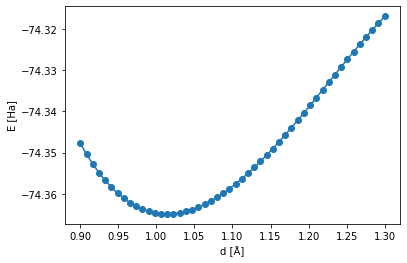

In [ ]:
plot(d,E,'o-')
xlabel('d [Å]')
ylabel('E [Ha]')